In [9]:
from matplotlib import pyplot as plt
import numpy as np
import sympy as sy
from sympy import lambdify
import math



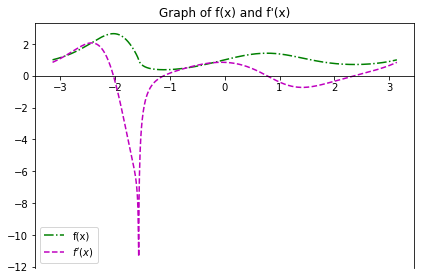

In [79]:
#question no. 1
def function_diff():
    x = sy.symbols('x')
    f_x= (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_prime = sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)), x)
    f_prime1 = lambdify(x, f_prime, 'numpy')
    f_x1 = lambdify(x, f_x, 'numpy')
    return f_x1, f_prime1
#lambdify makes the function to exist somethinh like globally.
#taking the values between -pi to pi for x variable
x = np.linspace(-np.pi, np.pi, 1000)
f_x , f_prime1 = function_diff()
fx =f_x(x)
fprime =f_prime1(x)
plt.plot(x, fx, 'g-.', label= "f(x)")
plt.plot(x, fprime, 'm--',  label = '$f^\prime(x)$')
ax = plt.gca() #it wraps around the current most graph
ax.spines['bottom'].set_position('zero') #shifts the postiton of graph to zero
plt.title("Graph of f(x) and f'(x)")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\shekh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


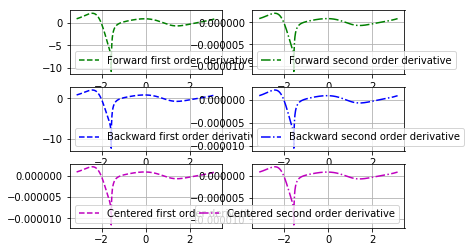

In [84]:
#question no. 2
def finite_diff(x, h):
    forward_1 = (f(x+h)- f(x))/h
    forward_2 = (-3*f(x)+4*f(x+h)-f(x+2*h))/2*h
    backward_1 = (f(x)-f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+f(x-2*h))/2*h
    centered_1 = (f(x+h)-f(x-h))/2*h
    centered_2 = (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/12*h
    return forward_1, forward_2, backward_1, backward_2, centered_1, centered_2

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f
x = np.linspace(-np.pi, np.pi, 1000)
forward_1, forward_2, backward_1, backward_2, centered_1, centered_2 = finite_diff(x, 1e-3)

#plt.xlimit(-5,5)
#plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.plot(x, forward_1,'g--', label ='Forward first order derivative') 
plt.grid('True')
plt.legend()
#plt.show() if we put this the graphs come after another.

plt.subplot(3,2,2)
plt.plot(x, forward_2, 'g-.', label = "Forward second order derivative")
plt.grid('True')
plt.legend()
#plt.show()

plt.subplot(3,2,3)
plt.plot(x, backward_1, 'b--',label = "Backward first order derivative")
plt.grid('True')
plt.legend()
#plt.show()

plt.subplot(3,2,4)
plt.plot(x, backward_2, 'b-.',label = "Backward second order derivative")
plt.grid('True')
plt.legend()
#plt.show()

plt.subplot(3,2,5)
plt.plot(x, centered_1, 'm--',label = "Centered first order derivative")
plt.legend(loc = 0)
plt.grid('True')
#plt.show()

plt.subplot(3,2,6)
plt.plot(x, centered_2, 'm-.',label = "Centered second order derivative")
plt.grid('True')
plt.legend(loc = 4)
plt.show()


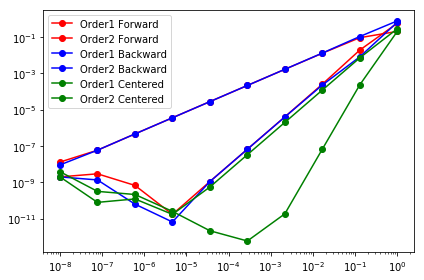

In [143]:
#question No. 3
# here I have modified the function of first question 
#to get exact derivative.
x = 1.0
def point_diff(x):
    f_x= (sy.sin(x)+1)**sy.sin(sy.cos(x))
    fprime =f_prime1(x)
    return fprime

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

def finite_diff(x, h):
    forward_1 = (f(x+h)- f(x))/h
    forward_2 = (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
    backward_1 = (f(x)-f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
    centered_1 = (f(x+h)-f(x-h))/(2*h)
    centered_2 = (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
    return forward_1, forward_2, backward_1, backward_2, centered_1, centered_2


h = np.logspace(-8,0,10) 
forward_1, forward_2, backward_1, backward_2, centered_1, centered_2 = finite_diff(x, h)
error1 = point_diff(x)- forward_1 #shall we put curly braces around them to store
#it as a list or tuple for all values of h?
error2 = point_diff(x)- forward_2
error3 = point_diff(x)- backward_1
error4 = point_diff(x)- backward_2
error5 = point_diff(x)- centered_1
error6 = point_diff(x)- centered_2
plt.loglog(h, abs(error1), 'r-o', label ='Order1 Forward' )
plt.loglog(h, abs(error2), 'r-o', label ='Order2 Forward' )
plt.loglog(h, abs(error3), 'b-o', label ='Order1 Backward' )
plt.loglog(h, abs(error4), 'b-o', label ='Order2 Backward' )
plt.loglog(h, abs(error5), 'g-o', label ='Order1 Centered' )
plt.loglog(h, abs(error6), 'g-o', label ='Order2 Centered' )
plt.tight_layout()
#plt.label("Plot of finite difference against error in measurement")
plt.legend()
plt.show()
# fx =f_x(np.pi)
# fprime =f_prime1(np.pi)
# fx, fprime

In [224]:
# Question no. 4
plane = np.load('plane.npy')
plane
a = 500
h = 1
alpha_rad = np.deg2rad(plane[:,1])
beta_rad = np.deg2rad(plane[:,2])
x = a*((np.tan(beta_rad))/((np.tan(beat_rad)-np.tan(alpha_rad))))
y = a*((np.tan(beta_rad)*np.tan(alpha_rad))/((np.tan(beat_rad)-np.tan(alpha_rad))))

def forward_1(t=0,h=1):
    forward_x = (x[t+h]- x[t])/h
    forward_y = (y[t+h]- y[t])/h
    return forward_x, forward_y

def backward_1(t=7, h=1):
    backward_x = (x[t]-x[t-h])/h
    backward_y = (y[t]-y[t-h])/h
    return backward_x, backward_y

def centered_1(t,h=1):
    centered_x = np.zeros(t-1)
    centered_y = np.zeros(t-1)
    for i in range (1,t):
        centered_x[i-1] = (x[i+h]-x[i-h])/(2*h)
        centered_y[i-1] = (y[i+h]-y[i-h])/(2*h)
    return centered_x, centered_y
b= (forward_1()[0]**2+ forward_1()[1]**2)**(1/2)
a = (centered_1(7)[0]**2+centered_1(7)[1]**2)**(1/2)
c = (backward_1()[0]**2+ backward_1()[1]**2)**(1/2)



print('the speed at different time points is : ', np.append(np.append(b,a),c))
# there should be a simpler way of doing this. I really need to know i am not thinking like a programmer here?

the speed at different time points is :  [46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]
